In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os


dataset = pd.read_csv('/content/drive/MyDrive/dataset/day.csv')
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
sns.pairplot(dataset)

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-10-056bb7e43149>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['cnt'])


<Axes: xlabel='cnt', ylabel='Density'>

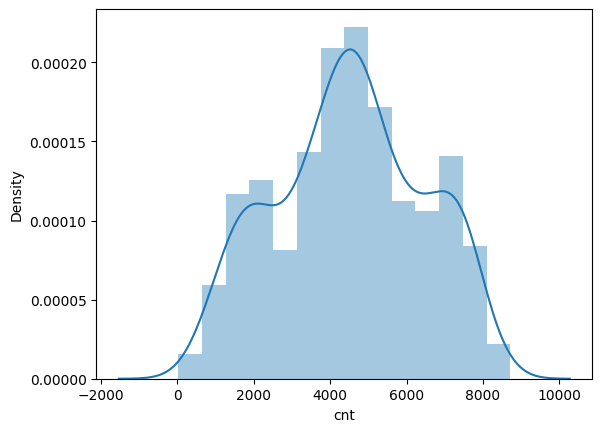

In [10]:
sns.distplot(dataset['cnt'])

<Axes: >

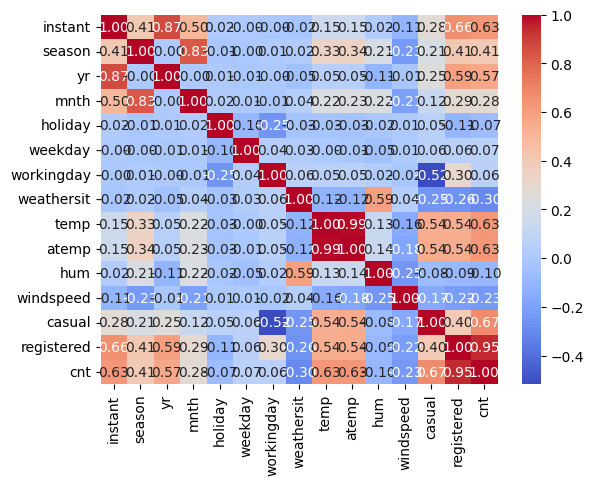

In [11]:
numeric_dataset = dataset.select_dtypes(include=['number'])
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = dataset[['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']]
y= dataset['cnt']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=101)
LR = LinearRegression()
LR.fit(X_train,  y_train)

In [13]:
print(LR.intercept_)

2.7284841053187847e-12


In [14]:
LR.coef_

array([-4.50922903e-15, -8.25561841e-13,  1.74962638e-12,  1.37026241e-13,
        9.25486696e-13,  6.26691387e-15, -3.16792652e-13,  5.46608352e-13,
       -3.84926879e-13, -5.25738998e-13, -2.86185736e-13,  4.21779453e-13,
        1.00000000e+00,  1.00000000e+00])

In [15]:
X_train.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered'],
      dtype='object')

In [16]:
pd.DataFrame(LR.coef_, X.columns, columns=['Coeff'])

,Coeff
instant,-4.509229e-15
season,-8.255618e-13
yr,1.749626e-12
mnth,1.370262e-13
holiday,9.254867e-13
weekday,6.266914e-15
workingday,-3.167927e-13
weathersit,5.466084e-13
temp,-3.849269e-13
atemp,-5.257390e-13


In [17]:
predictions = LR.predict(X_test)
predictions

array([5633., 7691., 4917., 7582., 3872., 3577., 2710., 3727., 3974.,
       4073., 7273., 2302., 4758., 4120., 3351., 6852., 7264., 5375.,
       5319., 4833., 4195., 4765., 1472., 6299., 1969., 1360., 5515.,
       7001., 2424., 5138., 7055., 7347., 6269., 6772., 2765., 2311.,
       5423., 6043., 1817., 4661., 1796., 6824., 2192., 4362., 2424.,
       3663., 4381., 6296., 2169., 6370., 7421., 3368., 2802., 4649.,
       7216., 3867., 2947., 5728., 5892., 3456., 2999., 6241., 5823.,
       6770., 3958., 2121., 4991., 3894., 3117., 5445., 2236., 6606.,
       2368., 7466., 2395., 4866., 4592., 6879., 7105., 4862., 6864.,
       3613., 1550., 5260., 4363., 6536., 1526., 7498., 1623., 2935.,
       5047., 7350., 2496., 1985., 4046., 5170., 6778., 3820., 3310.,
       3429., 4191., 4304., 3785., 4595., 2732., 5992., 5558., 1685.,
       4758., 3348., 4660., 4318., 4639.,  623., 1406., 7040., 3520.,
       3322., 1349., 4575., 5010., 3423., 7605., 3784., 6857., 3926.,
       2918., 6664.,

In [18]:
y_test

479    5633
648    7691
139    4917
601    7582
116    3872
       ... 
321    3392
693    2277
674    5259
464    5585
205    3840
Name: cnt, Length: 293, dtype: int64

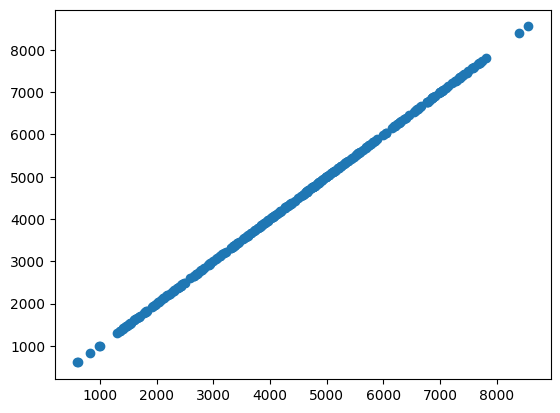

In [19]:
plt.scatter(y_test,predictions)

<ipython-input-24-f73d90a72b95>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='cnt', ylabel='Density'>

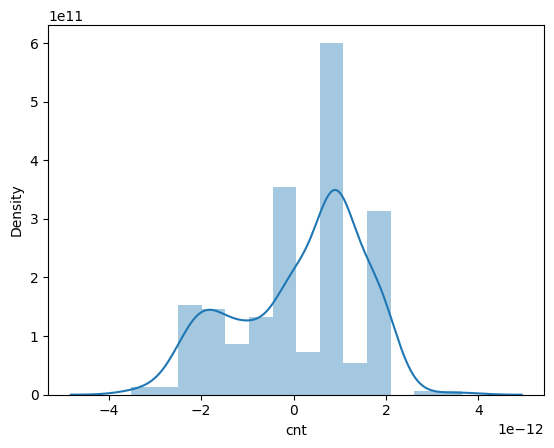

In [24]:
sns.distplot(y_test-predictions)

In [21]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

1.1376443965862738e-12

In [22]:
metrics.mean_squared_error(y_test, predictions)

1.832307395703267e-24

In [23]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.3536274951785172e-12